---
# **DY_Scanner_B3**
---

This project aims to scan and identify the stocks with the highest dividend yields on the Bovespa (São Paulo Stock Exchange) according to a user-specified reference year and visualizes the results in a colorful bar chart.

Este projeto tem como objetivo escanear e identificar as ações com os maiores rendimentos de dividendos na Bovespa (Bolsa de Valores de São Paulo) de acordo com um ano de referência especificado pelo usuário e visualizar os resultados em um gráfico de barras colorido.

### **Instalando e importando Bibliotecas - Installing and Importing Libraries**

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import random

### **Executando o Scanner e realizando os cálculos - Executing the Scanner and Performing Calculations**

In [ ]:
# Calculando o DY com base no Fechamento Ajustado
# Calculating the DY based on Adjusted Close

# Solicitar o ano de referência ao usuário
# Request the reference year from the user
year_reference = 2021

# Lista de tickers do IBRX 50
# List of IBRX 50 tickers
tickets_ibrx50 = [
    'ABEV3.SA', 'ALPA4.SA', 'AMAR3.SA', 'ARZZ3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA',
    'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRAP4.SA',
    'BRFS3.SA', 'BRKM5.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA', 'COGN3.SA',
    'CPFE3.SA', 'CRFB3.SA', 'CSAN3.SA', 'CSNA3.SA', 'CVCB3.SA', 'CYRE3.SA', 'ECOR3.SA', 'EGIE3.SA',
    'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENEV3.SA', 'ENGI11.SA', 'EQTL3.SA', 'EZTC3.SA',
    'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA',
    'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'LREN3.SA', 'MGLU3.SA',
    'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NTCO3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'PRIO3.SA',
    'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RENT3.SA', 'SBSP3.SA', 'SLCE3.SA', 'SUZB3.SA',
    'TAEE11.SA', 'TOTS3.SA', 'UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VIVT3.SA', 'WEGE3.SA',
    'YDUQ3.SA'
]

# Criar dataframes vazios para armazenar dados
# Create empty dataframes to store data
df_adj_close = pd.DataFrame()
df_dividends = pd.DataFrame()

# Baixar dados de fechamento ajustado e dividendos para cada ticker individualmente
# Download adjusted close and dividend data for each individual ticker
for ticker in tickets_ibrx50:
    print(f"Downloading data for {ticker}...")
    hist = yf.download(ticker, period="5y", actions=True)

    if 'Adj Close' in hist.columns and 'Dividends' in hist.columns:
        # Filtrar apenas ações que pagaram dividendos nos últimos 5 anos
        # Filter only stocks that paid dividends in the last 5 years
        if hist['Dividends'].sum() > 0:
            df_adj_close[ticker] = hist['Adj Close']
            df_dividends[ticker] = hist['Dividends']
        else:
            print(f"No dividends paid for {ticker} in the last 5 years.")
    else:
        print(f"Missing 'Adj Close' or 'Dividends' data for {ticker}.")

# Verifique se os dados foram baixados corretamente
# Check if data was downloaded correctly
if df_adj_close.empty or df_dividends.empty:
    print("Nenhum dado de fechamento ajustado ou dividendos foi encontrado.")
    print("No adjusted close or dividend data was found.")
else:
    # Converter o índice para datetime
    # Convert the index to datetime
    df_adj_close.index = pd.to_datetime(df_adj_close.index)
    df_dividends.index = pd.to_datetime(df_dividends.index)

    # Filtrar dados do ano de referência
    # Filter data for the reference year
    df_adj_close_year = df_adj_close[df_adj_close.index.year == year_reference]
    df_dividends_year = df_dividends[df_dividends.index.year == year_reference]

    # Calcular o preço médio de fechamento ajustado anual e adicionar a coluna de ano de referência
    # Calculate the average annual adjusted close price and add the reference year column
    avg_adj_close_year = df_adj_close_year.mean().to_frame(name='Average Adj Close')
    avg_adj_close_year['Ano de Referência'] = year_reference

    # Calcular o total de dividendos pagos no ano e adicionar a coluna de ano de referência
    # Calculate the total dividends paid in the year and add the reference year column
    total_dividends_year = df_dividends_year.sum().to_frame(name='Total Dividends')
    total_dividends_year['Ano de Referência'] = year_reference

    # Calcular o dividend yield anual e adicionar a coluna de ano de referência
    # Calculate the annual dividend yield and add the reference year column
    dividend_yield_year = (total_dividends_year['Total Dividends'] / avg_adj_close_year['Average Adj Close']).sort_values(ascending=False).to_frame(name='Dividend Yield')
    dividend_yield_year['Ano de Referência'] = year_reference

    # Ordenar todas as ações pelo maior dividend yield até o menor
    # Sort all stocks by highest to lowest dividend yield
    ordered_dividend_yield = dividend_yield_year.sort_values(by='Dividend Yield', ascending=False)

    # Armazenar o dataframe com os dados necessários
    # Store the dataframe with the necessary data
    data = pd.DataFrame({
        'Ticker': ordered_dividend_yield.index,
        'Dividend Yield': ordered_dividend_yield['Dividend Yield'].values,
        'Ano de Referência': ordered_dividend_yield['Ano de Referência'].values
    })

    # Exibir o dataframe final
    # Display the final dataframe
    print(data)
    print(avg_adj_close_year)
    print(total_dividends_year)



[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

No dividends paid for AMAR3.SA in the last 5 years.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

No dividends paid for AZUL4.SA in the last 5 years.



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


No dividends paid for BRFS3.SA in the last 5 years.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


No dividends paid for EMBR3.SA in the last 5 years.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


No dividends paid for ENEV3.SA in the last 5 years.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


No dividends paid for GOLL4.SA in the last 5 years.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

      Ticker  Dividend Yield  Ano de Referência
0   BRAP4.SA        0.573704               2021
1   PETR4.SA        0.557800               2021
2   PETR3.SA        0.541330               2021
3   MRFG3.SA        0.303945               2021
4   GOAU4.SA        0.273980               2021
..       ...             ...                ...
60  PRIO3.SA        0.000000               2021
61  IRBR3.SA        0.000000               2021
62  CVCB3.SA        0.000000               2021
63  ECOR3.SA        0.000000               2021
64  NTCO3.SA        0.000000               2021

[65 rows x 3 columns]
          Average Adj Close  Ano de Referência
ABEV3.SA          14.209440               2021
ALPA4.SA          44.629497               2021
ARZZ3.SA          75.932456               2021
ASAI3.SA          16.115254               2021
B3SA3.SA          13.896840               2021
...                     ...                ...
USIM5.SA          14.197917               2021
VALE3.SA          71.4871

In [ ]:
avg_close_year.tail(20)

,Average Close,Ano de Referência
NTCO3.SA,45.235764,2021
PCAR3.SA,26.746708,2021
PETR3.SA,10.443218,2021
PETR4.SA,10.134881,2021
PRIO3.SA,19.530097,2021
QUAL3.SA,23.680296,2021
RADL3.SA,23.234210,2021
RAIL3.SA,19.160645,2021
RENT3.SA,55.530235,2021
SBSP3.SA,35.843460,2021


In [ ]:
total_dividends_year.tail(20)

,Total Dividends,Ano de Referência
NTCO3.SA,0.000000,2021
PCAR3.SA,1.948627,2021
PETR3.SA,5.653232,2021
PETR4.SA,5.653232,2021
PRIO3.SA,0.000000,2021
QUAL3.SA,2.191043,2021
RADL3.SA,0.213552,2021
RAIL3.SA,0.000000,2021
RENT3.SA,0.440462,2021
SBSP3.SA,0.397900,2021


In [ ]:
data.head(20)

,Ticker,Dividend Yield,Ano de Referência
0,BRAP4.SA,0.573704,2021
1,PETR4.SA,0.557800,2021
2,PETR3.SA,0.541330,2021
3,MRFG3.SA,0.303945,2021
4,GOAU4.SA,0.273980,2021
5,VALE3.SA,0.204912,2021
6,BRKM5.SA,0.184060,2021
7,CPFE3.SA,0.183780,2021
8,CMIG4.SA,0.162514,2021
9,TAEE11.SA,0.162301,2021


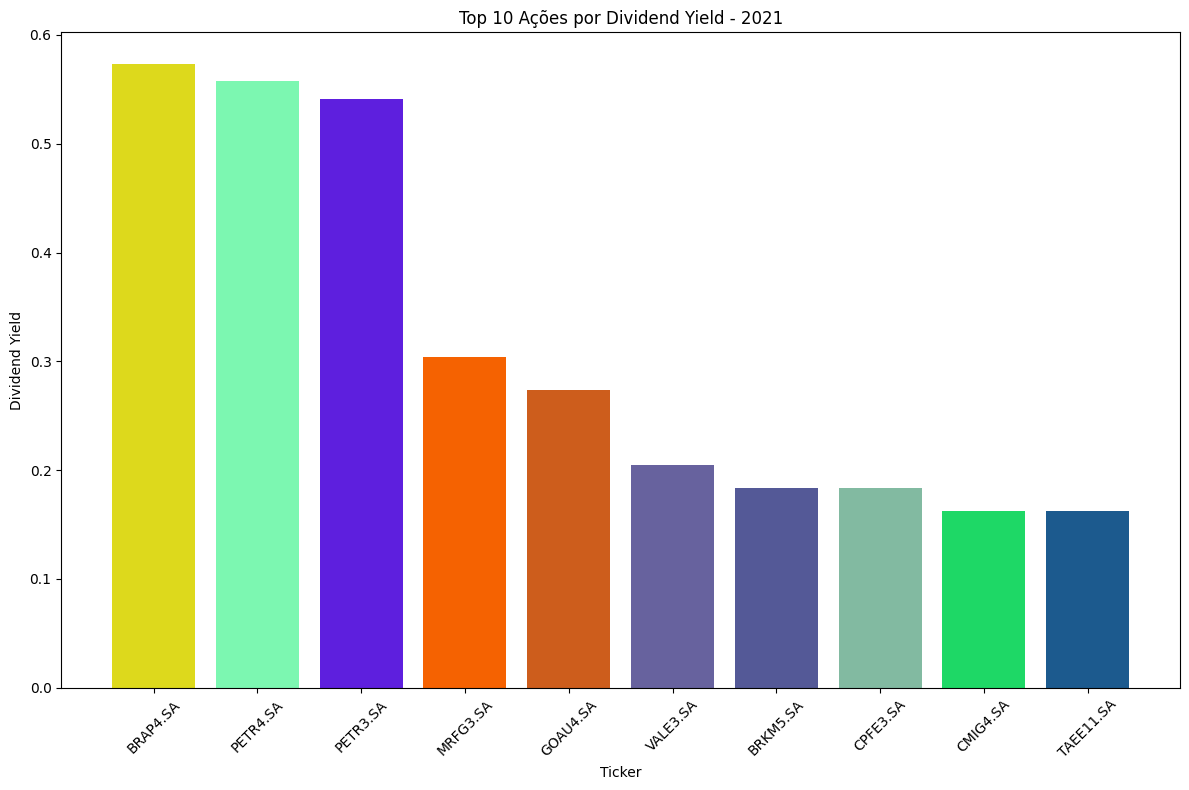

In [ ]:
# Função para plotar o gráfico de barras com cores aleatórias
def plot_dividend_yields(data, num_acoes=10):
    """
    Plota os Dividend Yields das ações em um gráfico de barras.

    Parâmetros:
    - data: DataFrame contendo as colunas 'Ticker', 'Dividend Yield' e 'Ano de Referência'
    - num_acoes: Número de ações a serem plotadas (default é 10)
    """
    # Ordenar os dados pelo Dividend Yield
    data_sorted = data.sort_values(by='Dividend Yield', ascending=False).head(num_acoes)

    # Gerar cores aleatórias
    colors = ['#%06X' % random.randint(0, 0xFFFFFF) for _ in range(num_acoes)]

    # Plotar o gráfico de barras
    plt.figure(figsize=(12, 8))
    plt.bar(data_sorted['Ticker'], data_sorted['Dividend Yield'], color=colors)
    plt.xlabel('Ticker')
    plt.ylabel('Dividend Yield')
    plt.title(f'Top {num_acoes} Ações por Dividend Yield - {data_sorted["Ano de Referência"].iloc[0]}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Exemplo de uso da função
plot_dividend_yields(data, num_acoes=10)